# Best Model for the Framimgham Dataset is:
### Neural Networks using Tensorflow/ Keras

Epoch 1/100


2024-09-20 12:11:42.170870: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


85/85 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7906 - val_loss: 0.4219 - val_accuracy: 0.8468
Epoch 2/100
85/85 [==============================] - 0s 898us/step - loss: 0.4407 - accuracy: 0.8467 - val_loss: 0.3919 - val_accuracy: 0.8468
Epoch 3/100
85/85 [==============================] - 0s 880us/step - loss: 0.4155 - accuracy: 0.8448 - val_loss: 0.3819 - val_accuracy: 0.8468
Epoch 4/100
85/85 [==============================] - 0s 880us/step - loss: 0.4088 - accuracy: 0.8474 - val_loss: 0.3812 - val_accuracy: 0.8468
Epoch 5/100
85/85 [==============================] - 0s 863us/step - loss: 0.4080 - accuracy: 0.8470 - val_loss: 0.3747 - val_accuracy: 0.8468
Epoch 6/100
85/85 [==============================] - 0s 857us/step - loss: 0.4027 - accuracy: 0.8463 - val_loss: 0.3715 - val_accuracy: 0.8468
Epoch 7/100
85/85 [==============================] - 0s 850us/step - loss: 0.4009 - accuracy: 0.8448 - val_loss: 0.3781 - val_accuracy: 0.8468
Epoch 8/100
8

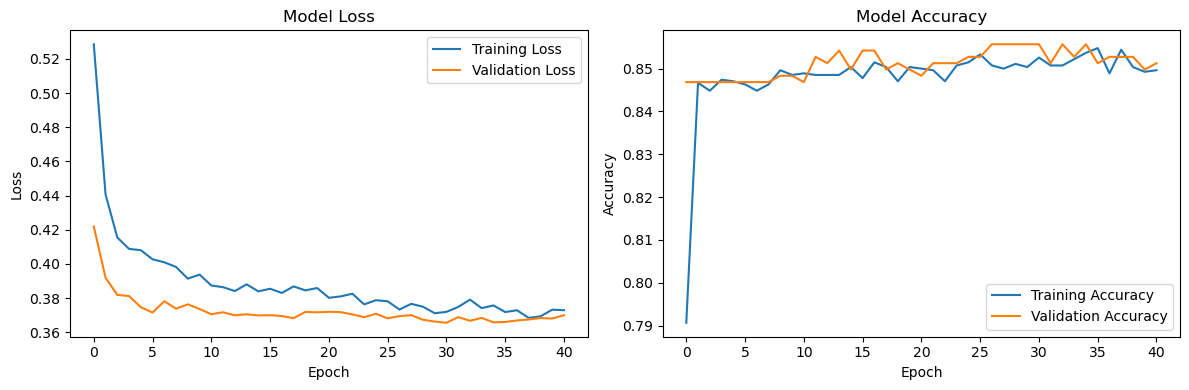

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the data
data = pd.read_csv('/Users/tadisinahasini/Documents/datasets/framingham.csv')
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Support Vector Machine

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Framingham dataset
data = pd.read_csv('/Users/tadisinahasini/Documents/datasets/framingham.csv')

# Separate features and target
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.8, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Results:
Accuracy: 0.8455

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2868
           1       0.50      0.01      0.02       524

    accuracy                           0.85      3392
   macro avg       0.67      0.50      0.47      3392
weighted avg       0.79      0.85      0.78      3392

